# Restaurant rating prediction (at Trip Advisor)
### или EDA в Случайном Лесу ресторанов
##### or ED'ing in the Random Forest of Restaurants

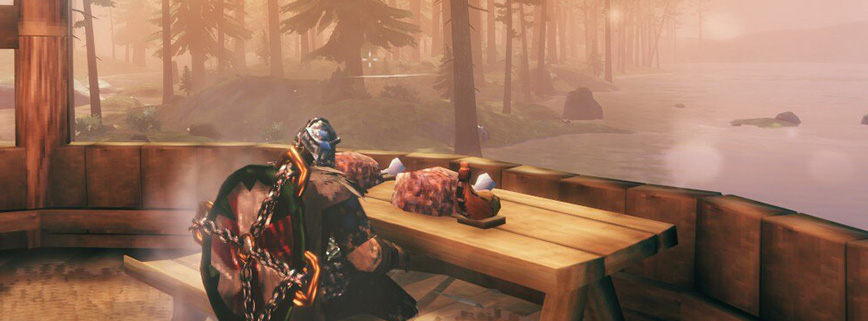

**The purpose of this training project** is to process data from [Trip Advisor](https://www.tripadvisor.com/) to:
> * predict, based on the parameters and ratings of trusted restaurants, what rating a different restaurant might have with the parameters you have.
> * get some interesting information about the restaurant business and cuisine styles on a global scale.

**Цель данного учебного проекта** -- сделать такую *обработку данных* с сайта [Trip Advisor](https://www.tripadvisor.com/), чтобы:
> * на основе данных о параметрах и рейтинге доверенных ресторанов предсказать, какой рейтинг может иметь некий иной ресторан с имеющимися у вас параметрами
> * получить немного интересной информации о ресторанном бизнесе и кулинарных стилях в мировом масштабе

--------------------

# We go straight to the point!
## И сразу к делу!

<a id="sec0"></a>
## [INDEX / оглавление](#sec0)
0. [Before we start / На старт!](#sec0.1)
    * [0.1  Importing dependencies and doing setups / Необходимые приготовления](#sec0.1)
    * [0.2  DATA loading / Загружаемся по полной!](#sec0.2)


1. [Features that work / Пусть данные поработают](#sec1)
    * [1.1  Making it machine-readable (basicly) / Приводим в читаемый машиной вид (базово)](#sec1)
    * [1.2  Normalizing some features / Нормализуем кое-что](#sec1.2)
    * [1.3  Creating some features / Создаем кое-что](#sec1.3)
        * [1.3.1  Rest_id_count: extra research / дополнительные исследования](#sec1.3.1)
        * [1.3.2  City: Welfare / Благосостояние](#sec1.3.2)
    * [1.4  Working with Cuisine Styles / Работаем c Кулинарными Стилями](#sec1.4)
    * [1.5  Working with Reviews / Работаем c Отзывами](#sec1.5)
    * [1.6  Searching for Outliners / Ищем Выбросы](#sec1.6)

    * [1.7  Preparing the junk to drop / Готовим баласт](#sec1.7)


2. [Final Cut / Последняя нарезка](#sec2)


3. [MODELING and testing / Моделирование и проверка](#sec3)
    * **[3.1  The most effective features / Самые эффективные признаки](#sec3.1)**


4. [Little bit of ANALYTICS / (русская версия аналитики -- ниже)](#sec4)   
    * [4.1  The Elusive Rating and it's entourage](#sec4.1)     
    * [4.2  What are the Rating's friends](#sec4.2)          
        * [4.2.1  City](#sec4.2.1)
        * [4.2.2  Ranking: Restaurant rank in the city](#sec4.2.2)
        * [4.2.3  Number of Reviews](#sec4.2.3)
        * [4.2.4  Reviews: A couple of reviews for the restaurant](#sec4.2.4)
        * [4.2.5  Cuisine Style](#sec4.2.5)
        * [4.2.6  ID_TA: Trip Advisor restaurant ID](#sec4.2.6)
        * [4.2.7  Restaurant_id — Restaurant / restaurant chain identification number](#sec4.2.7)
        * [4.2.10  Popularity of culinary styles in each city](#sec4.2.10)

   
    
5. [Немного аналитики / (English version of anaytics is upper)](#sec5) 

    * [5.1  Неуловимый Рейтинг](#sec5.1)
    
    * [5.2  С чем дружит Рейтинг](#sec5.2)          
        * [5.2.1  City: Город](#sec5.2.1)
        * [5.2.2  Ranking: Ранг ресторана в городе](#sec5.2.2)
        * [5.2.3  Number of Reviews: Количество отзывов о ресторане](#sec5.2.3)
        * [5.2.4  Reviews: Парочка отзывов о ресторане](#sec5.2.4)
        * [5.2.5  Cuisine Style: Кулинарные стили (кухни)](#sec5.2.5)
        * [5.2.6  ID_TA: Идентификатор ресторана на Trip Advisor](#sec5.2.6)
        * [5.2.7  Restaurant_id — идентификационный номер ресторана / сети ресторанов](#sec5.2.7)
        * [5.2.10  Популярность кулинарных стилей в каждом городе](#sec5.2.10)


6. [Submission](#sec6)


<a id="sec0.1"></a>
### Import dependencies
##### Необходимые приготовления

In [206]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,5)
#sns.set_theme(style="whitegrid", palette="colorblind")


# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


# Для преобразования в ячейках строк в список
from ast import literal_eval

import re

from sklearn.preprocessing import PolynomialFeatures

# MinMax нормализация 
from sklearn.preprocessing import MinMaxScaler

In [207]:
# Let's fix the version of the packages so that the experiments are reproducible:
# Зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [208]:
# Some PANDAS settings. 

# Зададим кол-во символов для показа
pd.options.display.max_colwidth = 74
# выводить все столбцы
pd.set_option('display.max_columns', None)

plt.rcParams['figure.figsize'] = (13,5)

GO TO [INDEX / оглавление](#sec0)
<a id="sec0.2"></a>
### DATA loading
##### Загружаемся по полной!

In [209]:
#DATA_DIR = 'sf-dst-restaurant-rating/'   # for local

DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'   # for kaggle
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

# To process traits correctly, combine train and test into one dataset
# ВАЖНО! Для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # signing train / помечаем где у нас трейн
df_test['sample'] = 0 # signing test / помечаем где у нас тест

# We don't have a Rating in the test, we have to predict it, so we just fill it with zeros for now
# В тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0 

data = pd.DataFrame() # recreating / для обновления
data = df_test.append(df_train, sort=False).reset_index(drop=True) # combining / объединяем

In [210]:
df_train.sample(3)

<a id="sec1"></a>
# Features that work
### Пусть данные поработают

GO TO [INDEX / оглавление](#sec0)
<a id="#sec1.1"></a>
## Making it machine-readable (basicly) and filling in the blanks
#### Приводим в читаемый машиной вид (базово) и заполняем пустоты

In [211]:
# Recreating the data variable so that there is a working and a clean dataset
# Пересоздаем переменную data (через промежуточную), чтобы был рабочий и чистовой датасет
data_init = pd.DataFrame()  # для обновления
data_init = data.copy()
data = pd.DataFrame()

# Re-filling it with the working base columns
# Заполняем ее заново рабочими базовыми колонками

# Taking the feature-sign
# Берем признак-признак 
data['sample'] = data_init['sample']

# Целевую переменную рейтинга берем как есть
data['Rating'] = data_init['Rating']


# Take the target rating variable as is
# Заменим символы цен на цифры 
data['Price_Range_num'] = data_init['Price Range'].replace(to_replace={'$':1, '$$ - $$$':2, '$$$$':3})
# Пустоты просто заполним серединой (это мода по всем городам)
data['Price_Range_num'] = data['Price_Range_num'].fillna(2)


# As now we take the ranks as they are
# Пока берем ранги как есть
data['Ranking'] = data_init['Ranking']

# -------------
# number of reviews, median
# медиана количества отзывов
median_rew = data_init['Number of Reviews'].median()
print(median_rew)

# Voids of the number of reviews we just fill with one or median, but first we save the information about the void in a new attribute
# Пустоты количества отзывов просто заполним единицей или медианой, но сначала инф. о пустоте сохраним в новом признаке
data['Number_of_Reviews_isNAN'] = pd.isna(data_init['Number of Reviews']).astype('uint8')
data['Number of Reviews'] = data_init['Number of Reviews'].fillna(1)


# deviation of number of reviews from the median
# определение отклонения числа обзоров от медианного
#data['Reviews_Discrepancy'] = data_init['Number of Reviews'].apply(lambda x: x/median_rew)

# logarithmization
#data_init['Number of Reviews'] = data_init['Number of Reviews'].fillna(median_rew)
#data['number_of_reviews_log'] = np.log(data_init['Number of Reviews'] + 1)


# Duplicated reviews: if different restaurants -- bad sign (but it doesn't improve MAE)

# Все дублированные отзывы (ухудшает без Reviews_dubls_id)
#data['Reviews_dubls'] = data_init.Reviews.duplicated()

# Дублирование отзывов: если разные рестораны -- плохой знак (не улучшает MAE)
#data['Reviews_dubls_id'] = data_init.duplicated(subset=['Restaurant_id', 'Reviews'])
# -------------

# Correcting the error of duplicating a city in the source
# Исправляем ошибку дублирования города в источнике
data_init.City = data_init.City.replace(to_replace={'Oporto': 'Porto'})

# Joining cities spreading (to dummies) them
# Присоединяем города, расправляя их (to dummies)
data['City'] = data_init['City']
data = pd.get_dummies(data, columns=['City'], dummy_na=True)


# Transforming site IDs to numeric
# Превращаем в числовой формат
data['ID_TA'] = data_init['ID_TA'].apply(lambda x: int(x[1:]))


# Voids (checking)
# Пустоты (проверка)
data.isna().sum()


GO TO [INDEX / оглавление](#sec0)
<a id="sec1.2"></a>
## Normalizing the features by the number of restaurants in the city
#### Нормализация признаков по кол-ву ресторанов в городе

In [212]:
# `Normalizing the features` by the number of restaurants in the city
# `Нормализация признаков` по кол-ву ресторанов в городе 


# `Normalizing the restaurant rank` relative to the maximum rank in the city
# `Нормализуем ранг ресторана` относительно максимального ранга в городе
data['Ranking_norm'] = data_init['Ranking'] / data_init['City'].map(data_init.groupby(['City'])['Ranking'].max())

# Counting the `number of restaurants` in the city
# Считаем `количество ресторанов` в городе
data_init['rest_in_city'] = data_init.groupby('City')['Restaurant_id'].transform('count')
data['rest_in_city'] = data_init['rest_in_city']

# Mutually `normalizing the ranks and number of restaurants` in the cities
# Взаимно `нормализуем ранги и кол-во ресторанов` в городах 
data['norm_rest_rank'] = data_init['rest_in_city']/data_init['Ranking']
data['norm_rank_rest'] = data_init['Ranking']/data_init['rest_in_city']


# Normalizing the number of reviews relative to the maximum of those in the city
# Нормализуем количество отзывов относительно максимального в городе
reviews_in_city = data_init.groupby(['City'])['Number of Reviews'].max().sort_values(ascending=False).to_dict()
data_init['reviews_in_city'] = data_init['City'].replace(to_replace=reviews_in_city)

data['norm_rank_reviews'] = data_init['Ranking'] / data_init['reviews_in_city']
# data['norm_reviews_rank'] = data_init['reviews_in_city'] / data_init['Ranking'] # worse MAE

GO TO [INDEX / оглавление](#sec0)
<a id="sec1.3"></a>
## Creating some features
#### Создаем кое-что

In [213]:
# Creating a feature with the `number of restaurants in the network`.
# (Assume economic sustainability and opportunities for development and efficiency)

# Создадим признак с `количеством ресторанов в сети` 
# (Предполагаем экономическую устойчивость и возможности развития и эффекивности)

# Словарь, которым заполним новый признак {'Restaurant_id':count}
id_count = data_init.Restaurant_id.value_counts().to_dict()
data['Rest_id_count'] = data_init.Restaurant_id.replace(to_replace=id_count)


# Create a feature to show that the `price was not specified`
# Создадим признак, показывающий, что `цена была не указана`
data['Price_Range_nan'] = pd.isna(data_init['Price Range']).astype('uint8')


# Trying to create `polynomial features` and choose the best
# Попробуем создать `полиноминальны признаки` и выберем лучшее
pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(data_init[['rest_in_city', 'Ranking','Number of Reviews']].fillna(1))
poly_frame = pd.DataFrame(poly_features, columns=['c1','c2','c3','c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10'])
data = pd.concat([data, poly_frame['c9']], axis=1)

GO TO [INDEX / оглавление](#sec0)
<a id="sec1.3.1"></a> 
### Rest_id_count: extra research / дополнительные исследования
see analytics on [these features](#sec4.2.7.2)
#### on Restaurant network in city, country, world
аналитика [этих признаков](#sec5.2.7.2)

In [214]:
# Creating countries
# Создаем страны
city_state = {
    'London': 'United Kingdom',
    'Paris': 'France',
    'Madrid': 'Spain',
    'Barcelona': 'Spain',
    'Berlin': 'Germany',
    'Milan': 'Italy',
    'Rome': 'Italy',
    'Prague': 'Czech',
    'Lisbon': 'Portugal',
    'Vienna': 'Austria',
    'Amsterdam': 'Netherlands',
    'Brussels': 'Belgium',
    'Hamburg': 'Germany',
    'Munich': 'Germany',
    'Lyon': 'France',
    'Stockholm': 'Sweden',
    'Budapest': 'Hungary',
    'Warsaw': 'Poland',
    'Dublin': 'Ireland' ,
    'Copenhagen': 'Denmark',
    'Athens': 'Greece',
    'Edinburgh': 'Schotland',
    'Zurich': 'Switzerland',
    'Porto': 'Portugal',
    'Oporto': 'Portugal',
    'Geneva': 'Switzerland',
    'Krakow': 'Poland',
    'Oslo': 'Norway',
    'Helsinki': 'Finland',
    'Bratislava': 'Slovakia',
    'Luxembourg': 'Luxembourg',
    'Ljubljana': 'Slovenija'
}

# Replacing cities with countries
# Заменяем города на страны
data_init['state'] = data_init['City'].map(city_state)

In [215]:
# Network representation (number of Restaurant_id):  
# -- FEATURE IS NOT REQUIRED, number of Restaurant_id, cities and states are EQUAL!

# Представленность сети (количество у Restaurant_id):  
# -- ПРИЗНАК НЕ ТРЕБУЕТСЯ, количество Restaurant_id, городов и государств СОВПАДАЮТ!


# Transferring (for convenience) the previously created feature
# Переносим (для удобства) созданный ранее признак
data_init['Rest_id_count'] = data['Rest_id_count']

#  городов / cities
id_city_count = data_init.groupby(['Restaurant_id'])['City'].count().to_dict()
data_init['id_city_count'] = data_init.Restaurant_id.replace(to_replace=id_city_count)


#  стран / countries
id_state_count = data_init.groupby(['Restaurant_id'])['state'].count().to_dict()
data_init['id_state_count'] = data_init.Restaurant_id.replace(to_replace=id_state_count)


# Почти все рестораны выборки имеют по 1 ресторану в городе, стране и мире!
# # Almost all sample restaurants have 1 restaurant each in the city, country, and world!
data_init[['Rest_id_count', 'id_city_count', 'id_state_count']].duplicated().value_counts()

GO TO [INDEX / оглавление](#sec0)
<a id="sec1.3.2"></a> 
### City: Welfare (GDP per capita) 
#### Благосостояние (ВВП на душу населения)

In [216]:
# Creating GDP per capita (2018 year) dictionary (thanks to World Databank)
# Создаем словарь с данными о ВВП на душу населения за 2018 (от World Databank)
gdp_pc_2018 = {
    'United Kingdom': 45973.5735,
    'France': 45342.39574,
    'Spain': 39715.43906,
    'Germany': 53074.54012,
    'Italy': 41830.42633,
    'Czech': 39743.59709,
    'Portugal': 33415.4379,
    'Austria': 55454.68929,
    'Netherlands': 56328.94114,
    'Belgium': 51407.99834,
    'Sweden': 53208.88436,
    'Hungary': 31102.50275,
    'Poland': 31336.6035,
    'Ireland': 83203.39468,
    'Denmark': 55671.16527,
    'Greece': 55671.16527,
    'Schotland': 45973.5735,
    'Switzerland': 68060.94105,
    'Portugal': 33415.4379,
    'Norway': 65510.58527,
    'Finland': 48416.93603,
    'Slovakia': 19364.62,
    'Luxembourg': 113337.4205,
    'Slovenija': 26104.103
}

In [217]:
# Replacing countries with GDP
# Заменяем страны на данные о ВВП
data_init['GDP'] = data_init['state'].map(gdp_pc_2018)
#data['GDP'] = data_init['GDP']
#data['GDP']#.value_counts()  #data_init

GO TO [INDEX / оглавление](#sec0)
<a id="sec1.4"></a>
## Working with Cuisine Styles
#### Работаем c Кулинарными Стилями

In [218]:
# Filling the emptiness in the kitchens
# Заполняем пустоту на кухнях
data_init['Cuisine Style'] = data_init['Cuisine Style'].fillna("['Unknown']")  # "['Unknown']"

# Converting string in the column into a list
# Преобразование строки в столбце в список
data_init['Cuisine Style'] = data_init['Cuisine Style'].apply(
    lambda x: eval(x))  # transforming to a list

# Number of restaurant's Cuisines 
# Количество кухонь у ресторана
data['Cuisine_num'] = data_init['Cuisine Style'].apply(lambda x: len(x))

# Creating columns for each kitchen
# Создаем столбцы для каждой кухни
Cuisines_dum = pd.get_dummies(data_init['Cuisine Style'].explode()).reset_index().groupby('index').sum()

# Joining to data
# Присоединяем к data
data = pd.concat([data, Cuisines_dum], axis = 1)

In [219]:
# Creating a feature showing how popular (in the city) cuisines each restaurant uses.
# Создадим признак, показывающий, насколько популярные в городе кухни использует каждый ресторан.

# Для этого создадим вспомогательную таблицу (City_Cuisines_norm) популярности кухонь в городах.
# (она сама по себе доволно интресна)


# Разворачиваем (explode) кухни по вертикали,
# присоединяем их к городам и группируем по городам (в отдельный DF)
# Смотрим популярность кухонь в городах
Cuisines_expl = pd.get_dummies(data_init['Cuisine Style'].explode())
City_Cuisines_dum = pd.concat([data_init['City'], Cuisines_expl], axis = 1).groupby("City").sum()
City_Cuisines_dum.style.background_gradient(cmap="Blues", axis=1)


# Нормализуем полученную таблицу, перевернув (для удобства дальнейшего использования)
City_Cuisines_scaler = MinMaxScaler()
City_Cuisines_norm = pd.DataFrame(data=City_Cuisines_scaler.fit_transform(City_Cuisines_dum.T),
                               index=City_Cuisines_dum.columns,
                               columns=City_Cuisines_dum.index)
# City_Cuisines_norm.style.background_gradient(cmap="Blues", axis=1)


# Теперь возьмем из основной таблицы отдельно города и развернутые по индексам (exploded) кухни
CityCuisines_expl = data_init.explode('Cuisine Style')[['City', 'Cuisine Style']]

# И поменяем в колонке с кухнями значения кухонь на соответствующие значения из таблицы City_Cuisines_norm.
CityCuisines_rank = pd.DataFrame()
for city in data_init.City.unique():
    CityCuisines_rank = CityCuisines_rank.append(CityCuisines_expl[CityCuisines_expl.City == city].replace(to_replace=City_Cuisines_norm[city].to_dict()))


# В заключении создадим искомый признак, нормализуя его по количеству кохонь в городе
data['CityCuisines_rank'] = CityCuisines_rank['Cuisine Style'].reset_index().groupby('index').sum()
data['CityCuisines_rank'] = data['CityCuisines_rank'] / data['Cuisine_num']
data['CityCuisines_rank'][:2]

GO TO [INDEX / оглавление](#sec0)
<a id="sec1.5"></a>
## Working with Reviews
#### Работаем c Отзывами

In [220]:
# create a template for search
lrx = re.compile('\[\[.*\]\]')
nan = None


def review_extraction(row):
    '''Function is called for extracting data from column 
    reviews and splitting it out into a separate columns
    INPUT: Whole dataset
    OUTPUT: Dataset with additional columns'''

    cell = row['Reviews']    # TYPE here your COLUMN
    aux_list = [[], []]  # create an auxilliary list for saving temp.data
    if type(cell) == str and lrx.fullmatch(cell):  # compare with searech template
        aux_list = eval(cell)  # transform into a list

    row['first_review'] = aux_list[0][1] if len(aux_list[0]) > 1 else nan
    row['last_review'] = aux_list[0][0] if len(aux_list[0]) > 0 else nan

    row['first_date'] = pd.to_datetime(
        aux_list[1][1] if len(aux_list[1]) > 1 else nan)
    row['last_date'] = pd.to_datetime(aux_list[1][0] if len(
        aux_list[1]) > 0 else nan, format='%m/%d/%Y', errors='coerce')

    row['first_date'] = pd.to_datetime(row['first_date'])
    row['last_date'] = pd.to_datetime(row['last_date'])

    return row


# apply the function to dataset and see the result
data_init = data_init.apply(review_extraction, axis=1)
data_init.sample(3)

In [221]:
# Counting the difference in days between reviews (correcting the negative difference), filling in the blanks with mode
# Считаем разницу в днях между отзывами (исправляя отрицательную разницу), пустоты заполняем модой
data['rev_date_diff'] = abs(data_init['last_date'] - data_init['first_date']).apply(lambda x: x.days).fillna(1)
#sns.boxplot(data['rev_date_diff'].values)

In [222]:
# Ухудшает MAE (незначительно)
# Сколько дней последнего отзыва ресторана от даты последнего отзыва в датасете
#data['rev_date_last'] = (data_init['last_date'].max() - data_init['last_date']).apply(lambda x: x.days).fillna(2)
#sns.boxplot(data['rev_date_diff'].values)

# Ухудшает MAE
#data['Review_1_exists'] = data_init['first_date'].notnull()
#data['Review_2_exists'] = data_init['last_date'].notnull()

GO TO [INDEX / оглавление](#sec0)
<a id="sec1.6"></a>
## Searching for Outliners
#### Ищем Выбросы

In [223]:
# ищем выборосы
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

o = pd.DataFrame()


In [224]:
# Ranking  -- ухудшает MAE
# o = outliers_iqr(data_init['Ranking'].dropna())
# data['Ranking'][o] = data_init['Ranking'].mode()[0]


In [225]:
# Number of Reviews   -- не влияет на MAE
# according to the boxplot it seems that values higher than 5000 are real outliers
# will replace higher values by 5000
# data['Number of Reviews'] = data['Number of Reviews'].apply(lambda x: np.random.randint(300, 500) if x > 500 else x)

GO TO [INDEX / оглавление](#sec0)
<a id="sec1.7"></a>
## Preparing the junk to drop
#### Готовим баласт

In [226]:
# Let's leave only those cuisines that are more `than 30% popular in top-10 cities`
# Оставим только те кухни, популярность которых `выше 30% в top-10 городов`
City_Cuisines_top = pd.DataFrame()
for city in City_Cuisines_norm.sum().sort_values(ascending=False)[:10].index:
    City_Cuisines_top[city] = City_Cuisines_norm[City_Cuisines_norm[city] > 0.3][city]

City_Cuisines_top.index.to_list()

In [227]:
Cuisines_to_drop = [city for city in City_Cuisines_norm.index.to_list() if city not in City_Cuisines_top.index.to_list()]

-----------------------------------

GO TO [INDEX / оглавление](#sec0)
<a id="sec2"></a>
## Final Cut
#### Последняя нарезка

In [228]:
df_preproc = data #.drop(columns=Cuisines_to_drop)
df_preproc.sample(3)

In [229]:
#df_preproc.info()


In [230]:
#df_preproc.describe()


In [231]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)
# X_test, y_test -- для валидации

# MinMax общая нормализация (обычно ухудшает)
train_scaler = MinMaxScaler()
#X = train_scaler.fit_transform(X)



# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42


# X_test, y_test -- для валидации
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)


# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

# ((10000, 35), (40000, 35), (40000, 34), (32000, 34), (8000, 34))

GO TO [INDEX / оглавление](#sec0)
<a id="sec3"></a>
## Modeling and testing
#### Моделирование и проверка 

<img src="https://4.bp.blogspot.com/_15hf9pFgwks/S0Tx2j4jl3I/AAAAAAAAAWo/0YQwpN51z5E/s320/Fig+2-1+Fortune+teller.jpg" width="400px">

In [232]:
# Importing The Crystall Ball
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели


# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)


# Обучаем модель на тренировочном наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

In [233]:
# We can observe that the ratings always increment by range of 0.5
# So there's a function that makes it most precise the real values
# Сделаем предсказанные рейтинги более точными, округлив их до кратности шагу рейтинга 0.5
def round_rating_pred(rating_pred):
    if rating_pred <= 0.5:
        return 0.0
    if rating_pred <= 1.5:
        return 1.0
    if rating_pred <= 1.75:
        return 1.5
    if rating_pred <= 2.25:
        return 2.0
    if rating_pred <= 2.75:
        return 2.5
    if rating_pred <= 3.25:
        return 3.0
    if rating_pred <= 3.75:
        return 3.5
    if rating_pred <= 4.25:
        return 4.0
    if rating_pred <= 4.75:
        return 4.5
    return 5.0


#for i in range(len(y_pred)):
#    y_pred[i] = round_rating_pred(y_pred[i])
    
y_pred = np.array([round_rating_pred(x) for x in y_pred])


In [234]:
# The moment of truth
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

GO TO [INDEX / оглавление](#sec0)
<a id="sec3.1"></a>
### The most effective features
##### Самые эффективные признаки

In [235]:
# Let's see the most important features
# В RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [236]:
# Beneficial Features for MAE
# Полезные для MAE признаки
features_eff = pd.Series({'norm_rank': 0.0022,
    'Rest_id_count': 0.0001,
    'rest_in_city': 0.0011,
    'Price_Range_nan': 0.0009,
    'Cousines': 0.0051,
    'Polynomial': 0.0021,
    'Cuisine_num': 0.0005,
    'CityCuisines_rank': 0.0003,
    'norm_rank_reviews': 0.0009,
    'round y_pred': 0.0279,
    'ID_TA': 0.0096,
    'rev_date_diff': 0.0025,
    'GDP': 0.0022,                         
    'rev_date_last': -0.0002,
    'train_scaler': 0.0003}).T.sort_values()

plt.rcParams['figure.figsize'] = (13,5)
features_eff.plot(kind='barh', title='Beneficial Features for MAE / Полезные для MAE признаки')

In [237]:
# Checking the order of the lines
# Проверяем порядок строк (не должен измениться при EDA)
display(df_test.head(5), test_data.head(5))

-----------------

GO TO [INDEX / оглавление](#sec0)
<a id="sec4"></a>
# Little bit of analytics
### [русская версия аналитики -- в следующем разделе (ссылка)](#sec5)

**(Dedicated to survivors / посвящается выжившим)**

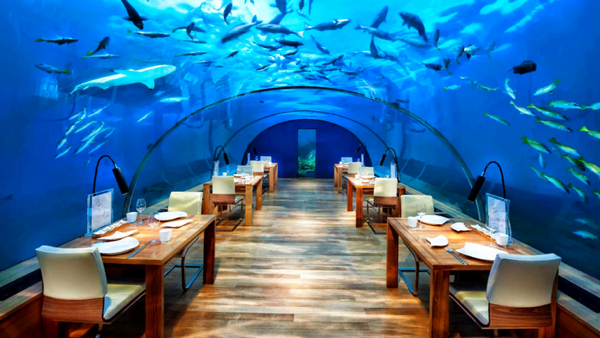

<a id="sec4.1"></a>
## The Elusive Rating and it's entourage
So, the main goal of this work is -- 
> to investigate **what affects the rating** of restaurants on 'www.tripadvisor.com' and train the ML model to **predict or verify** the rating of other restaurants.

Let's look at our target variable with the rating in the training sample, **how its values are distributed**:
 - general range of values from 1 to 5 in increments of 0.5
 - the middle values are concentrated around 4
 - most of the values are concentrated from 3.5 to 4.5
 - values, which also cannot be ignored, range from 2 to 5
 - some drop down values are at 1.5 and 1
 
> **It's just like a regular school with a regular student!**

In [238]:
df_train.Rating.value_counts()

In [239]:
sns.boxplot(df_train.Rating.values)

### And here is the context of the variables,
among which our rating happens to be and which should help us determine it:

In [240]:
df_train.sample(3)

#### What features do we have initially:
* City 
* Cuisine Style
* Ranking: The restaurant's rank in relation to other restaurants in the city
* Price Range: Restaurant prices in 3 categories
* Number of Reviews
* Reviews: Last 2 reviews and dates of reviews
* URL_TA: The restaurant's page on 'www.tripadvisor.com'. 
* ID_TA: TripAdvisor restaurant ID
* Rating: Rating of the restaurant

### Let's see a random restaurant
- Review for it in full
- Website address
> This is the Augustiner Schützengarten from Munich

In [241]:
# Случайный ресторан
df_train.iloc[4]

In [242]:
# Отзыв о нем полностью
df_train.Reviews[4]

In [243]:
# Адрес на сайте
# https://www.tripadvisor.ru/Restaurant_Review-g274924-d1112354-Reviews-Massimo_Ristorante-Bratislava_Bratislava_Region.html
# Это Augustiner Schützengarten из Мюнхена

print('https://www.tripadvisor.ru' + df_train.URL_TA[4])

**A little observation:**
> It turned out to be a **strong middle man** and, looking ahead, it uses the **most trending culinary styles** (cuisines) in his city. And not the worst for the restaurant business.

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2"></a>
## What are the Rating's friends
**Variables** (including those created in this job) that **most affect** the guessing of the rating
- The most important attributes for the model (according to its report)
- Useful attributes for MAE (empirically identified)

In [244]:
# Самые важные признаки для модели (по ее отчету)
feat_importances.nlargest(20).plot(kind='barh')

In [245]:
# Полезные для MAE признаки (эмпирически выявленные)
features_eff.plot(kind='barh', title='Beneficial Features for MAE / Полезные для MAE признаки')

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.1"></a>
## City
The "City" feature has the **strongest effect** on model performance. Without it, the prediction accuracy drops **to 50%**!

Cities are the *environment in which a restaurant operates. And everything by which its success and rating can be measured, is determined by local conditions.

> Therefore, **general feature values** in this job are **normalized to urban** ones.

#### Here are the cities with the best average restaurant ratings (top-10):
> can go!

In [246]:
data_init.groupby(['City'])['Rating'].mean().sort_values(ascending=False)[:10].plot(kind='barh')

#### Welfare (GDP per capita) 
- Simple logic, it would seem: 
 - The more free money a person has, the more he can port for nice services
 - the greater is the attendance and number of restaurants
 - the greater the competition between them
 - and the higher the quality of those services and, therefore, the higher the rating.

##### What does the Rating think about this?
- We see the greatest concentration of GDP values around 40 - 50 thousand.
- For all rating values 
- (see Rating 5 and 3, correlation Rating <--> GDP)

##### How did the trait with GDP affect the performance of the model? 
> Notably, but inconsistently: 
> - with basic processing -- positively 
> - with maximal processing -- negatively

In [247]:
# рестораны с рейтингом 5 (по оси X -- Ранг, по оси Y - количество)
data_init['GDP'][data_init['Rating'] == 5].hist(bins=100)

In [248]:
data_init['GDP'][data_init['Rating'] == 3].hist(bins=100)

In [249]:
# Как соотносится ВВП на душу населения с рейтингом ресторанов?
sns.jointplot(data=data_init, x="Rating", y="GDP", kind="reg")

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.2"></a>
## Ranking: Restaurant rank in the city
among other restaurants (of this city)
> less number - better rank

#### Let's look at the distribution of the raw rank feature
This is the top 10 cities by rank, where:
- X-axis is the ranks of the restaurants in the city
- The Y axis is the number of restaurants with close rank values

In [250]:
# Это топ 10 городов по рангу
for x in (data_init['City'].value_counts())[0:10].index:
    data_init['Ranking'][data_init['City'] == x].hist(bins=100)
plt.show()

#### And here is the distribution of the Ranks trait reduced to a common scale (normalized to 1):
> This variant of the feature turned out to be **the most influential** in this model (in it's opinion), nevertheless, the raw Ranks feature is also left "for the greater importance" of both. It's worse without it.

In [251]:
# Топ 10 городов по нормализованному рангу 
for x in (data_init['City'].value_counts())[0:10].index:
    data['Ranking_norm'][data_init['City'] == x].hist(bins=100)
plt.show()

#### Let's look at the distribution of Rank relative to Rating
- On average, restaurants with a rating of 5 have a higher rank than
- Restaurants with a rating of 3, which also indicates the power of this attribute

In [252]:
# рестораны с рейтингом 5 (по оси X -- Ранг, по оси Y - количество)
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

In [253]:
# рестораны с рейтингом 3 (по оси X -- Ранг, по оси Y - количество)
df_train['Ranking'][df_train['Rating'] == 3].hist(bins=100)

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.3"></a>
## Number of reviews on the restaurant


#### Let's see how many restaurants we have with how many reviews (top-50):
- and we see that people aren't really in a hurry to leave reviews (what a surprise!):
 - the maximum number of restaurants has 2 reviews each!
 - As the number of reviews is increasing, number of restaurants with them -- is decreasing

In [254]:
# Посмотрим, сколько ресторанов с каким количеством отзывов унас имеется (top-50):
data_init['Number of Reviews'].value_counts()[:50].plot(kind='bar')

#### How do the number of reviews correlate with restaurant ratings?
- We see the highest number of reviews for restaurants with a rating of 4 and 4.5!
- That number **reaches 10,000**!
- **It's hard to believe the reviews aren't inflated...**
- **And the rating doesn't seem to "think" about it!**
> In fact, **attempting to correct** such numbers (as "outliers") for reasonable numbers, **doesn't have a positive effect on the performance of the model**...

In [255]:
# Как соотносится количество отзывов с рейтингом ресторанов?
sns.jointplot(data=df_train, x="Rating", y="Number of Reviews", kind="reg")

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.4"></a>
## Reviews: A couple of them for the Restaurant
#### It would seem: what can we get from just two reviews?
> But we did!

- We were able to distinguish **the difference between the dates** of these reviews
- And that gave us a **significant increase** in the quality of the model's work!

> This means that **response from the visitors**, as a measure of the strength of the impression made, is important to Trip Advisor. 

> They're right: being able to surprise is an important part of competitiveness and, therefore, the development of both the business and the industry.

**However, the overwhelming (downright crushing) majority of the reviews are written 1 ("one") day apart!**
> **And the rating likes it!**

In [256]:
data.rev_date_diff.value_counts()[:5].plot(kind='bar')

#### Duplicated reviews:
> if they are restaurants of different nets - it's a bad sign!

- Total duplicates:  6484
- Intra-network duplicates: 1630
- Are the rest of them **stealed reviews**?
- And that's **20% of the selection**!

**And the Rating doesn't care!**


In [257]:
print('Total duplicates: ', data_init.Reviews.duplicated().sum())
print('Intra-network duplicates: ', data_init.duplicated(subset=['Restaurant_id', 'Reviews']).sum())

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.5"></a>
## Cuisine Style
> **One of the most important components of the rating**

<a id="sec4.2.6"></a>
### I created a table with data on the popularity of culinary styles in each city
>*it is very fascinating!

[The full version of this table is below, at the end of the analytics section](#sec4.2.10)    <--- it's a link, if you mind


#### In the meantime -- here are the Top 10 cities with the greatest variety of popular cuisines
- The darker the color, the more popular is the cuisine in the city.
- The more to the left, the greater is the variety of popular styles and their concentration.

- It's not hard to see that European and vegetarian cuisines take the lead.
> And yes, this is Europe.

In [258]:
# Top-10 городов с самым большим разнообразием популярных кулинарных стилей
# City_Cuisines_top.fillna(0).style.background_gradient(cmap="YlOrBr", axis=1) # -- чуть по-другому...
sns.heatmap(City_Cuisines_top, annot = True, cmap='YlOrBr')

#### Also, each restaurant has got a score for the trendiness of its cuisines (in the city)
**What do we see?**
- A significant portion of the restaurants stick to **the main cuisine in town, and only that**!
- A sizable portion combines various secondary cuisines (middle of the range)
- And a **small portion of the restaurants don't hit the trends** of the city (right side of the chart) ... 

In [259]:
data['CityCuisines_rank'].hist(bins=50)

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.6"></a>
## ID_TA: Restaurant ID on Trip Advisor
#### Mysterious feature with its power 
> *It's just -- affecting ...**


In [260]:
features_eff.sort_values(ascending=False)[:5].plot(kind='barh')

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.7"></a>
## Restaurant_id - restaurant net's identification number
#### Must be a useful attribute, because:
> The **larger is the net**, the broader it spreads across the country and the world, **the more sustainable** is the business, and more opportunities should it have to **influence the rating** positively.


**Number of restaurants in the networks**

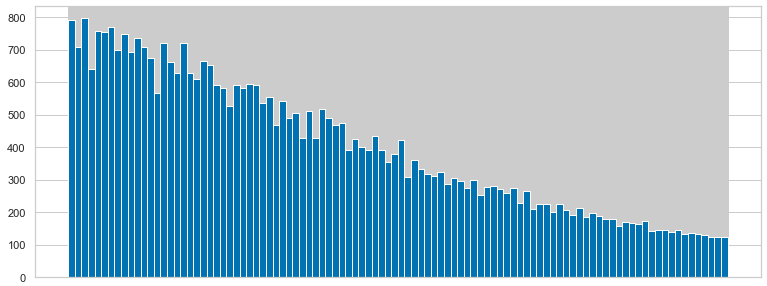

In [261]:
# Number of restaurants in the networks
# Количество ресторнов в сетях
# data_init.Restaurant_id.hist(bins=100) # long time...

#### A new feature was made based on this one, with **the number of restaurants in the chain**.
> But the created one **did not affect the model much**.

<a id="sec4.2.7.2"></a>
#### It was interesting to find out (in detail) how many restaurants has a net in:
 * each city
 * in the country 
 * and in the world
 
(here is the code for [created attributes](#sec1.3.1))

#### BUT:
> We find **a lot of duplicates**! How many of them are there!?


In [262]:
# We find a large number of doubles! How many are there!?
# Мы обнаруживаем большое количество дублей! Сколько же их!?
data_init[['Rest_id_count', 'id_city_count', 'id_state_count']].sample(10)

#### Almost all the restaurants in the selection have 1 restaurant each in the one city, one country, and (one) world! That's such a selection!
> Interesting features did not take place! Columns are not included in the model...

In [263]:
# Почти все рестораны выборки имеют по 1 ресторану в городе, стране и мире! Вот такая выборка!
# Almost all sample restaurants have 1 restaurant each in the city, country, and world! Such a selection!
data_init[['Rest_id_count', 'id_city_count', 'id_state_count']].duplicated().value_counts()

----------------------

GO TO [INDEX / оглавление](#sec0)
<a id="sec5"></a>
# Немного аналитики
### [(English version of anaytics is in the previous section)](#sec4)

<a id="sec5.1"></a>
## Неуловимый Рейтинг и его окружение
Итак, основная цель данной работы -- 
> исследовать, **что влияет на рейтинг** ресторанов на портале 'www.tripadvisor.com' и обучить модель МО **предсказывать или проверять** рейтинг других ресторанов.

Посмотрим на нашу целевую переменную с рейтингом в тренировочной выборке, **как распределены ее значения**:
 - общий размах значений от 1 до 5 с шагом 0,5
 - серединные значения сосредоточены в районе 4
 - большая часть значений сосредоточена от 3,5 до 4,5
 - значения, которые тоже нельзя не учитывать, простираются от 2 до 5
 - отдельные выпадающие значения относятся к 1,5 и 1
 
**Вобщем, как в обычной школе у обычного ученика!**

In [264]:
df_train.Rating.value_counts()

In [265]:
sns.boxplot(df_train.Rating.values)

### А вот -- тот контекст переменных,
среди которых оказался наш рейтинг и которые должны нам помочь его определить:

In [266]:
df_train.sample(3)

#### Какие признаки мы имеем изначально:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

### Посмотрим случайный ресторан
- Отзыв о нем полностью
- Адрес на сайте
> Это -- Augustiner Schützengarten из Мюнхена

In [267]:
# Случайный ресторан
df_train.iloc[4]

In [268]:
# Отзыв о нем полностью
df_train.Reviews[4]

In [269]:
# Адрес на сайте
# https://www.tripadvisor.ru/Restaurant_Review-g274924-d1112354-Reviews-Massimo_Ristorante-Bratislava_Bratislava_Region.html
# Это Augustiner Schützengarten из Мюнхена

print('https://www.tripadvisor.ru' + df_train.URL_TA[4])

**Маленькое наблюдение:**
> Он оказался **крепким середнячком** и, забегая вперед, отметим, что использует **наиболее  трендовые кулинарные стили** (кухни) в своем городе. И не самом плохом для ресторанного бизнеса.

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2"></a>
## С чем дружит Рейтинг
**Переменные** (в том числе созданные в этой работе), **наиболее влияющие** на угадывание рейтинга
- Самые важные признаки для модели (по ее отчету)
- Полезные для MAE признаки (эмпирически выявленные)

In [270]:
# Самые важные признаки для модели (по ее отчету)
feat_importances.nlargest(20).plot(kind='barh')

In [271]:
# Полезные для MAE признаки (эмпирически выявленные)
features_eff.plot(kind='barh', title='Beneficial Features for MAE / Полезные для MAE признаки')

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2.1"></a>
## City: Город
Признак "Город" имеет **сильнейшее влияние** на работу модели. Без этого признака точность презсказания падает **до 50%**!

Города -- это  *среда, в которой действует ресторан*. И все, чем может быть измерен его успех и рейтинг, определяется местными условиями.

> Поэтому **общие значения признаков** в данной работе **нормализованы к городским**.

#### Вот города c самым лучшим средним рейтингом ресторанов (top-10):
> можно ехать!

In [272]:
data_init.groupby(['City'])['Rating'].mean().sort_values(ascending=False)[:10].plot(kind='barh')

#### Благосостояние (ВВП на душу населения)
- Простая логика, казалось бы: 
 - чем больше у человека свободных денег, тем больше он может портатить на приятные услуги
 - тем больше посещаемость ресторанов и их количество
 - тем выше конкуренция между ними
 - и выше качество этих услуг, а значит -- рейтинг

##### Что думает об этом сам Рейтинг?
- наибольшую концентрацию значений ВВП мы видим в районе 40 - 50 тыс.
- при любых значениях рейтинга 
- (см. ниже рейтинг 5 и 3, корреляцию Рейтинг <--> ВВП)

##### Как признак с ВВП повлиял на работу модели? 
> Заметно, но противоречиво: 
> - при базовой обработке -- положительно 
> - при максимальной обработке -- отрицательно

In [273]:
# рестораны с рейтингом 5 (по оси X -- Ранг, по оси Y - количество)
data_init['GDP'][data_init['Rating'] == 5].hist(bins=100)

In [274]:
data_init['GDP'][data_init['Rating'] == 3].hist(bins=100)

In [275]:
# Как соотносится ВВП на душу населения с рейтингом ресторанов?
sns.jointplot(data=data_init, x="Rating", y="GDP", kind="reg")

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2.2"></a>
## Ranking: Ранг ресторана в городе
среди других ресторанов (этого города)
> меньше цифра -- лучше ранг

#### Посмотрим на распределение необработанного признака Рангов
Это -- топ 10 городов по рангу, где:
- по оси X - ранги расторанов в городе
- по оси Y - количество ресторанов с близкими значениями ранга

In [276]:
# Это топ 10 городов по рангу
for x in (data_init['City'].value_counts())[0:10].index:
    data_init['Ranking'][data_init['City'] == x].hist(bins=100)
plt.show()

#### А вот распределение приведенного к общему масштабу (нормализованного к 1) признака Рангов:
> Этот вариант признака оказался **самым влиятельным** в данной модели (по ее мнению), тем не менее, необработанный признак Рангов тоже оставлен "для пущей важности" обоих. Без него -- хуже.

In [277]:
# Топ 10 городов по нормализованному рангу 
for x in (data_init['City'].value_counts())[0:10].index:
    data['Ranking_norm'][data_init['City'] == x].hist(bins=100)
plt.show()

#### Посмотрим распределение Ранга относительно Рейтинга
- в среднем, рестораны с рейтингом 5 имеют более высокий ранг, чем
- рестораны с рейтингом 3, что также говорит о силе влияния этого признака

In [278]:
# рестораны с рейтингом 5 (по оси X -- Ранг, по оси Y - количество)
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

In [279]:
# рестораны с рейтингом 3 (по оси X -- Ранг, по оси Y - количество)
df_train['Ranking'][df_train['Rating'] == 3].hist(bins=100)

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2.3"></a>
## Reviews: Количество отзывов о ресторане


#### Посмотрим, сколько ресторанов с каким количеством отзывов унас имеется (top-50):
- и увидим, что люди не особо торопятся оставлять отзывы (экий сюрприз!):
 - максимальное количество ресторанов имеет по 2 отзыва!
 - с увеличением количества отзывов снижается и количество ресторанов, обладающих ими

In [280]:
# Посмотрим, сколько ресторанов с каким количеством отзывов унас имеется (top-50):
data_init['Number of Reviews'].value_counts()[:50].plot(kind='bar')

#### Как соотносится количество отзывов с рейтингом ресторанов?
- Максимальное количество отзывов мы видим у ресторанов с рейтингом 4 и 4,5!
- Это количество **достигает 10000** штук!
- *Трудно поверить, что оттзывы не накручены...*
- **И, кажется, рейтинг "не думает" об этом!**
> Ведь **попытка исправить** такие количества (как "выбросы") на разумные цифры, **не сказывается положительно на работе модели**...

In [281]:
# Как соотносится количество отзывов с рейтингом ресторанов?
sns.jointplot(data=df_train, x="Rating", y="Number of Reviews") #, kind="reg"

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2.4"></a>
## Reviews: Парочка Отзывов о ресторане
#### Казалось бы: что нам могут дать всего два отзыва о ресторане?
> А кое-что смогли!

- Удалось выделить **разницу между датами** этих отзывов
- И это нам дало значительный прирост в качестве работы модели!

> Это значит, что **ответная активность посетителей**, как показатель силы произведенного впечатления, важен для Trip Advisor. 

> И в этом они правы: умение удивить -- важная составляющая конкуреннтной борьбы, а значит и развития как отдельного бизнеса, так и отрасли вцелом.

**Однако, подавляющее (прямо раздавливающее) большинство отзывов написано с разницей в 1 (прописью: "один") день!**
> И рейтингу это нравится!

In [282]:
data.rev_date_diff.value_counts()[:5].plot(kind='bar')

#### Дублирование отзывов:
> если это рестораны разных сетей -- плохой знак!

- Всего дублей:  6484
- Дублей внутри сети:  1630
- А остальные что, **воруют отзывы**?
- И ведь это **20% выборки**!

**А рейтингу все равно!**


In [283]:
print('Всего дублей: ', data_init.Reviews.duplicated().sum())
print('Дублей внутри сети: ', data_init.duplicated(subset=['Restaurant_id', 'Reviews']).sum())

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2.5"></a>
## Cuisine Style: Кулинарные стили (кухни)
> **Одна из важнейших составляющих рейтинга**

<a id="sec4.2.6"></a>
### Создана таблица с данными о популярности кулинарных стилей в каждом городе 
> **она очень увлекательна!**.

[Полный вариант этой таблицы представлен ниже, в конце раздела с аналитикой](#sec4.2.10)    <--- это ссылка, если что


#### А пока -- Top-10 городов с самым большим разнообразием популярных кухонь
- Чем темнее цвет, тем выше популярность кухни в городе.
- Чем левее, тем больше разннобразие популярных стилей, их концентрация

- Не трудно заметить, что лидерство у европейской и вегетарианской кухонь.
> И да, это -- Европа

In [284]:
# Top-10 городов с самым большим разнообразием популярных кулинарных стилей
# City_Cuisines_top.fillna(0).style.background_gradient(cmap="YlOrBr", axis=1) # -- чуть по-другому...
sns.heatmap(City_Cuisines_top, annot = True, cmap='YlOrBr')

#### Также каждому ресторану был присвоен бал по трендовости его кухонь (в городе)
**Что мы видим?**
- Значительная часть ресторанов придерживается **главной кухни в городе, и только ее**!
- Заметная часть совмещает различные второстепенные кухни (середина диапазона)
- И **немалая часть ресторанов не попадает в тренды** города (правая часть графика). 

In [285]:
data['CityCuisines_rank'].hist(bins=50)

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2.6"></a>
## ID_TA: Идентификатор ресторана на Trip Advisor
#### Таинственный в своей мощности признак
> **Он просто -- влияет...**


In [286]:
features_eff.sort_values(ascending=False)[:5].plot(kind='barh')

GO TO [INDEX / оглавление](#sec0)
<a id="sec5.2.7"></a>
## Restaurant_id — идентификационный номер ресторана / сети ресторанов
#### Должно быть, полезный признак, потому что:
> Чем **больше сеть**, чем шире она распространена по стране и миру, **тем устойчивей** должен быть бизнес и тем больше возможности имеет сеть для позитивного **влияния на рейтинг**.


**Количество ресторнов в сетях**

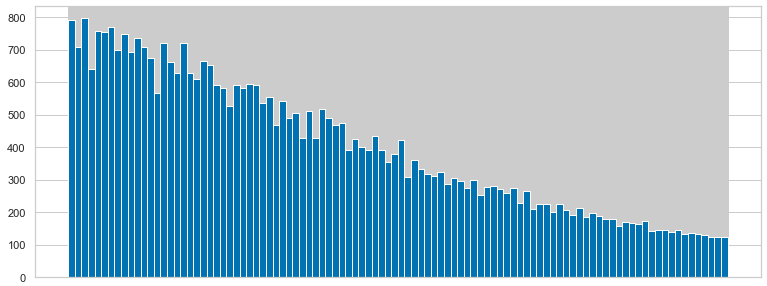

In [287]:
# Number of restaurants in the networks
# Количество ресторнов в сетях
# data_init.Restaurant_id.hist(bins=100) # долго

#### На основе этого признака был изготовлен новый, с указанием **количества ресторанов в сети**.
> Но созданный признак **на работу модели сильно не повлиял**.

<a id="sec5.2.7.2"></a>
#### Интересно было узнать детально, сколько ресторанов у каждой сети имеется в:
 * каждом городе
 * в стране 
 * и в мире
 
(вот разработка кода для [соотвествующих признаков](#sec1.3.1))

#### НО:
> Мы обнаруживаем **большое количество дублей**! Сколько же их!?


In [288]:
# We find a large number of doubles! How many are there!?
# Мы обнаруживаем большое количество дублей! Сколько же их!?
data_init[['Rest_id_count', 'id_city_count', 'id_state_count']].sample(10)

#### Почти все рестораны выборки имеют по 1 ресторану в 1 городе, в 1 стране и в (1) мире! Вот такая выборка!
> Интересные признаки не состоялись! Колонки не включены в модель...

In [289]:
# Почти все рестораны выборки имеют по 1 ресторану в городе, стране и мире! Вот такая выборка!
# Almost all sample restaurants have 1 restaurant each in the city, country, and world! Such a selection!
data_init[['Rest_id_count', 'id_city_count', 'id_state_count']].duplicated().value_counts()

GO TO [INDEX / оглавление](#sec0)
<a id="sec4.2.10"></a>
<a id="sec5.2.10"></a>
# Popularity of culinary styles in each city
### О популярности кулинарных стилей в каждом городе
> **Одна из важнейших составляющих рейтинга**

back to [analytics on Cuisines](#sec4.2.6)     /     обратно к [аналитике по Кухням](#sec5.2.6)

In [290]:
City_Cuisines_norm.style.background_gradient(cmap="YlOrBr", axis=1)

back to [analytics on Cuisines](#sec4.2.6)     /     обратно к [аналитике по Кухням](#sec4.2.6)

GO TO [INDEX / оглавление](#sec0)
<a id="sec6"></a>
# Submission
Если все устраевает - готовим Submission на кагл

In [291]:
# Проверить порядок строк (не должен измениться при EDA)
test_data.head(10)

In [292]:
test_data = test_data.drop(['Rating'], axis=1)

In [293]:
sample_submission

In [294]:
predict_submission = model.predict(test_data)

In [295]:
predict_submission

In [296]:
# Round
#for i in range(len(predict_submission)):
#    predict_submission[i] = round_rating_pred(predict_submission[i])

predict_submission = np.array([round_rating_pred(x) for x in predict_submission])


In [297]:
predict_submission

In [298]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)